In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

params = {'legend.fontsize' : 'x-large',
          'figure.figsize' : (30, 10),
          'axes.labelsize' : 'x-large',
          'axes.titlesize' : 'x-large',
          'xtick.labelsize' : 'x-large',
          'ytick.labelsize' : 'x-large'}
sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

## 1、train数据集

In [2]:
dpath = '../Data/'
train = pd.read_csv(dpath + "train.csv")
members = pd.read_csv(dpath + "members.csv")
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [4]:
nanNames = ['source_system_tab','source_screen_name','source_type']
train[nanNames] = train[nanNames].replace(0, np.NaN)
print(train.isnull().sum())

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64


In [5]:
cateFeatures=['source_system_tab', 'source_screen_name', 'source_type']
for col in cateFeatures:
    print('\n%s属性的不同取值和出现次数' %col)
    print(train[col].value_counts())
    # 缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
    train[col+"_miss"] = train[col].apply(lambda x: 1 if pd.isnull(x) else 0)
    train[[col,col+"_miss"]].head()
# for col in cateFeatures:
#     # 查看缺省值与结果的相关性
#     corrCols = train[[col+"_miss", "target"]].corr().abs()
#     print("\nThe correlation between missing values{} and target is:{}".format(
#         col+"_miss", corrCols))
#     plt.subplots(figsize = (3,2))
#     sns.heatmap(corrCols, annot=True)


source_system_tab属性的不同取值和出现次数
my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

source_screen_name属性的不同取值和出现次数
Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

source_type属性的不同取值和出现次数
loc

In [6]:
# # 分析数据可以知道数据是否缺省与结果的关系不大
# for col in cateFeatures:
#     train.drop([col+"_miss"], axis=1, inplace=True)
#     # maxCounts表示单列出现频率最高的变量
#     maxCounts = np.argmax(np.bincount(col))
#     print(maxCounts)
#     train[col].apply(lambda x: maxCounts if pd.isnull(x) else x)

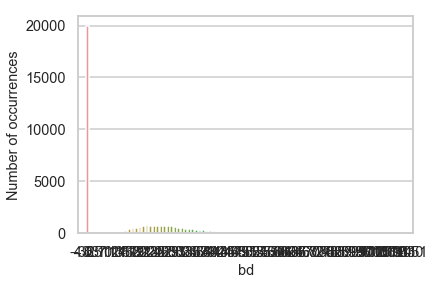

In [7]:
sns.countplot(members.bd);

plt.xlabel("bd");
plt.ylabel("Number of occurrences");